In [1]:
from janome.tokenizer import Tokenizer
import re
import zipfile
import urllib.request
import os.path,glob

#ダウンロードしたいURLを入力する
URL = 'https://www.aozora.gr.jp/cards/001779/files/56684_ruby_65241.zip'
#分かち書き作成ファイル
WAKATI = 'wakachi_text.txt'

def main():
    download_text = download(URL)
    text = convert(download_text)

    #分かち書き作成
    write_wakachi_text(word_analyze(text))

def write_wakachi_text(results):
    write_file = WAKATI
    with open(write_file, 'w', encoding='utf-8') as fp:
        fp.write("\n".join(results))

def word_analyze(text):
    t = Tokenizer()
    results = []
    lines = text.split("\r\n")

    for line in lines:
        tokens = t.tokenize(line)
        r = []
        for token in tokens:
            w = token.surface
            ps = token.part_of_speech
            hinshi = ps.split(',')[0]
            r.append(w)
        rl = (" ".join(r)).strip()
        print(rl)
        results.append(rl)

    return results

def convert(download_text):
    binarydata = open(download_text, 'rb').read()
    text = binarydata.decode('shift_jis')

    # ルビ、注釈などの除去
    text = re.split(r'\-{5,}', text)[2]
    text = re.split(r'底本：', text)[0]
    text = re.sub(r'《.+?》', '', text)
    text = re.sub(r'［＃.+?］', '', text)
    text = text.strip()
    return text

def download(url):
 # データファイルをダウンロードする
 zip_file = re.split(r'/', url)[-1]

 if not os.path.exists(zip_file):
     print('Download URL')
     print('URL:',url)
     urllib.request.urlretrieve(url, zip_file)
 else:
     print('Download File exists')

 # フォルダの生成
 dir, ext = os.path.splitext(zip_file)
 if not os.path.exists(dir):
     os.makedirs(dir)

 # zipファイルの展開
 zip_obj = zipfile.ZipFile(zip_file, 'r')
 zip_obj.extractall(dir)
 zip_obj.close()

 # zipファイルの削除
 os.remove(zip_file)

 # テキストファイルの抽出
 path = os.path.join(dir,'*.txt')
 list = glob.glob(path)
 return list[0]

if __name__ == "__main__":
    main()

Download URL
URL: https://www.aozora.gr.jp/cards/001779/files/56684_ruby_65241.zip
き も だ めし の 会

名 探偵 ｜ 明智 小五郎 の 少年 助手 、 小林 芳雄 君 を 団長 と する 少年 探偵 団 は 、 小学校 の 五 、 六 年生 から 中学 の 一 、 二 年生 まで の 少年 二 十 人 ほど で 組織 さ れ て い まし た 。 みんな が 近く に 住ん で いる わけ で は なく 、 学校 も ちがっ て いる 少年 が おおい ので 、 この 二 十 人 が 、 いつ で も 集まる わけ で は あり ませ ん 。 とき によって 、 事件 に かん けいする 少年 たち の 、 顔ぶれ が ちがう の です 。
みんな 学生 です から 、 学校 の ある 時間 に は 、 探偵 の はたらき は でき ませ ん 。 また 、 お うち で 勉強 も し なけれ ば なり ませ ん 。 です から 、 日曜日 の ほか は 、 すこし の 時間 しか 、 はたらけ ない の です 。
ことに 、 夜 そ と へ 出 て 冒険 を する こと は 、 おとうさん や おかあさん が お ゆるし に なら ない うち が おおい ので 、 小林 団長 は 、 団員 たち を 夜 あつめる こと は 、 できるだけ し ない よう に し て い まし た 。 お ゆるし が で た 少年 たち だけ を 、 七 時 か 八 時 ごろ まで 集める こと に し て 、 それ いじ ょう 夜ふかし を し ない よう に 、 こころがけ て い まし た 。
でも 、 事件 は 、 夜 おこる こと が おおい ので 、 夜ふけ に はたらか なけれ ば なら ない とき に は 、 少年 探偵 団 で は なく て 、 チンピラ 別働隊 を つかう こと に し て い まし た 。 チンピラ 隊 は 、 『 アリ の 町 』 で 、 くず ひろい を やっ て いる 少年 たち で 、 夜 の 冒険 なんか 、 へ いき です から 、 つご う が いい の です 。
少年 探偵 団 員 たち は 、 なに も 事件 が ない とき に は 、 明

あの とき 、 怪物 は ケラ ケラ と 笑い ながら 、 高い 木 の 上 に 浮き あがっ て いっ て 、 そのまま 闇 の 空 へ 、 す がた を 消し て しまい まし た 。
少年 団 員 たち は 、 こわく なっ て 、 そのまま 、 めいめい の うち へ 逃げ かえり 、 おとうさん に 、 その こと を 話し まし た が 、
「 そんな ばか な こと が ある もん か 。 きっと 、 リン で も 、 もえ て いる の を 、 見 まちがえ た の だろ う 。 」
と いっ て 、 すこし も 、 とりあっ て くださら ない の でし た 。
むりもありません 。 全身 銀色 に かがやい て 、 目 は まっ 赤 に ひかり 、 口 の 中 は 火 の よう に もえ て いる 人間 なんて 、 この世 に いる はず が ない から です 。
ところが 、 少年 たち は 、 夢 を 見 た の で は あり ませ ん 。 あの 恐ろしい やつ は 、 やっぱり 、 ほんとう の 怪物 だっ た の です 。 それ から 二 、 三 日 たっ た 、 ある ばん の こと 、 こんど は 千代田 区 の 、 や しき 町 の まんなか に 、 銀色 の やつ が 、 あらわれ た の です 。
もう 、 夜 の 十 一 時 を すぎ て い まし た 。 まだ ところどころ に 、 広い あき 地 の ある 、 さびし いやしき 町 を 、 火の番 の おじいさん が 、
「 火 の 用心 。 」 ちょん 、 ちょん … … 。
と 、 拍子木 を たたき ながら 歩い て い まし た 。
腰 に 、 ぶら ぢ ょうちんをさげていますが 、 小さな ロウソク と みえ て 、 いま に も 消え そう な 心 ぼ そい あかり です 。
そこ は 、 両 が わに 長い 塀 の つづい て いる 、 まっ暗 な 町 でし た 。 常夜灯 も 、 電球 が われ て 消え て しまい 、 鼻 を つまま れ て も 、 わから ぬ ほど の 暗 さ です 。
いっぽう は 、 コンクリート の 万 年 塀 です が 、 もう いっぽう は 、 まっ黒 に ぬっ た 板 塀 で 、 いっそう 、 まっ暗 に みえる の です 

小林 君 が 世田谷 の 杉本 さん の うち に つい た の は 、 八 時 ごろ でし た 。 りっぱ な おや しき です 。 コンクリート の 塀 に 、 石 の 門 、 から 草 も よう の 鉄 の 扉 、 門 を はいる と 、 うえこみ が あっ て 、 その むこ う に 、 二 階 だて の 西洋 館 が そびえ て い まし た 。
あと で わかっ た の です が 、 杉本 さん は 、 いくつ も の 会社 の 重役 を つとめ て いる お 金持ち でし た 。 それでいて 、 まだ 四 十 歳 ぐらい の 若 さ な の です 。 よほど 、 腕きき の 実業 家 な の でしょ う 。
玄関 の ベル を おし ます と 、 女中 さん が ドア を ひらい て 、 応接間 へ とおし て くれ まし た 。
「 やあ 、 よく き て くれ まし た ね 。 まあ 、 おかけ なさい 。 」
杉本 さん は 、 し たて の よい 背広 を 着 て い まし た 。 じ ぶん も 、 いす に かける と 、 ポケット から 、 大きな 手帳 を だし 、 その間 に はさん で あっ た 名刺 の よう な 紙 を とりだし て 、 すぐ に 、 説明 を はじめ まし た 。
「 きょう の 昼 すぎ です 。 この 名刺 を 持っ て 、 ひとり の 男 が たずね て き た 。 年 ごろ は 三 十 ぐらい だろ う か 、 黒い 背広 を 着 て い た が 、 なんとも いえ ない 、 へん な 顔色 を し て いる 。
黄色い 粉 でも ぬっ た よう な 、 きみ の わるい 顔色 です 。 そして 、 部屋 に は いっ て も 、 白い 皮 の 手袋 を はめ た まま で 、 ぬが ない の です 。
名刺 に は 『 北 森 七郎 』 と 印刷 し て あっ た 。 むろん 、 いちど も あっ た こと の ない 男 です 。 ふつう なら 、 こんな 男 を 部屋 に とおし たり し ない ん だ が 、 わたし の 友人 から 電話 で 、 あっ て やっ て くれ と いっ て き た ので 、 しかた なく 、 とおし た の です 。
その 北 森 という 男 は 、 なにか 、 つまら

小林 君 は 、 いつのまにか 、 そっと おとな たち の そば を はなれ て 、 門 の ほう へ 、 さまよい 出 て いっ た の です 。 それ は 夜光 人間 が 、 ヒノキ の てっぺん から 消えうせる より も 、 ずっと まえ でし た 。
小林 君 は 門 の そ と に 出 て 、 キョロキョロ あたり を 見 まわし まし た 。 いったい 、 なに を さがし て いる の でしょ う 。
すると 、 道 の むこ う の 、 暗闇 の 中 から 、 小さな もの の す がた が あらわれ 、 チョコ チョコ と 、 こちら へ かけよっ て き まし た 。 それ が 、 門灯 の ぼんやり し た 光 の 中 へ 、 近づい た の を 見る と 、 小林 君 より も ずっと 小さい 少年 でし た 。
なんて 、 きたない 少年 でしょ う 。 顔 は まっ黒 に よごれ 、 服 は ぼろぼろ で 、 まるで 、 こ じき の 子 みたい です 。 しかし 、 その きたない 顔 の なか に 、 目 だけ が 、 かしこ そう に 、 キラキラ と 、 光っ て い まし た 。
少年 は 、 小林 君 の そば に かけよる と 、 その 耳 に 口 を あて て 、 なにか ぼそぼそ と 、 ささやき まし た 。
ふしぎ な こと に 、 小林 君 は 、 いっこうに おどろく よう す も あり ませ ん 。 まじめ な 顔 で 、 少年 の ないしょ 話 を 聞い て い ます 。
「 ね 、 だから 、 きっと 、 あいつ が 、 すべっ て くる ん だ よ 。 これ が 魔法 の たね だ よ 。 」
きたない 少年 が 、 耳 から 口 を はなし て 、 と くい らしく 、 いう の でし た 。
「 うん 、 そう か 。 えらい 。 さすが は ポケット 小僧 だ な 。 よく みつけ た 。 で 、 みんな そこ に いる ん だ ね 。 」
小林 君 の ことば で 、 少年 の すじ ょうがわかりました 。 この チビスケ は 、 チンピラ 別働隊 の ポケット 小僧 だっ た の です 。 からだ は ポケット に は いる くらい 小さい けれども 、 かしこく て 、 す ば しっ こい

「 ウフフフ … … 、 わし の 顔 を 、 よく 見 なさい 。 これ は 、 わし の ほんとう の 顔 じゃ ない 。 面 を かぶっ て いる の だ 。 だが 、 きみ は 、 こんな やわらかい 面 を 、 まだ 見 た こと が ない だろ う ね 。
二 、 三 年 前 に 、 こういう やわらかい 面 が 、 フランス から 輸入 さ れ て 、 日本 で も 売り ださ れ た こと が ある 。 それ は 、 道化師 の よう な おどけ た 顔 ばかり だっ た が 、 わし は 、 あれ に ならっ て 、 あれ より も 、 もっと 上等 の 面 を つくら せ た の だ 。
この 面 は 、 ビニール で でき て いる ん だ よ 。 だから 、 顔 に ぴたり と 吸い つい て 、 顔 の 肉 が 動け ば 、 その とおり に 、 この 面 も 動く 。
口 と 目 の ところ は 、 くりぬい て あっ て 、 もの を いえ ば 口 が 動く し 、 目 の あな の 中 で 、 まばたき すれ ば 、 面 が まばたき し て いる よう に 見える の だ 。
ところで 、 マユミ さん 、 わし が 、 なぜ 、 こんな 面 を かぶっ て いる か 、 わかる か ね 。
いう まで も なく 、 顔 を かくす ため だ よ 。 マユミ さん 、 この 面 の 下 に 、 どんな 顔 が 、 かくさ れ て いる と 思う か ね ？ 」
男 は 、 かん で ふくめる よう に 、 ゆるゆる と 説明 し まし た 。 マユミ さん は 、 お 面 に かくさ れ て いる 顔 の こと を 思う と 、 から だ が しびれ た よう に なっ て 、 身動き する こと も でき ませ ん 。
「 ウフフフ … … 、 よく 見 なさい 。 こうして はがせ ば 、 面 は 取れ て しまう の だ よ 。 」
男 は 、 すくっ と 立ちあがっ て 、 黒い とり うち 帽 を 取り ます と 、 ふさふさ と し た 、 黄色 っぽい 髪の毛 が あらわれ まし た 。 それから 、 両手 の 指 を 、 ひたい の 上 にかけて 、 やわらかい お 面 を 、 くるくる っと 、 はぎとっ て しま

その 暗闇 の 中 で 、 明智 探偵 は 、 タバコ を 吸う の も がまん し て 、 しんぼうづよく 待ち ぶせ し て い まし た 。
庭 の 見 はり を うけもっ て いる 三 人 の 刑事 は 、 ばらばら に 分かれ て 、 木 の しげみ に かくれ 、 じっと 、 あたり に 気 を くばっ て い まし た 。
すると 、 まっ暗 な 庭 の 立木 の あいだ に 、 青白い 光りもの が 、 フワッ と 浮き だし て き た で は あり ませ ん か 。 夜光 怪人 の 首 です 。 大きな 赤い 目 が 、 らん らん と かがやき 、 耳 まで さけ た 口 が 、 火 の よう に もえ て い ます 。
しかし 、 それ を み て も 、 刑事 たち は 、 かくれ 場所 から とびだし ませ ん 。 怪物 が 美術 室 へ しのびこむ の を 待っ て いる の です 。 明智 探偵 が 怪物 を とらえ て 、 あ い ず を する まで 、 けっして さわが ない よう に と 、 いいつけ られ て い た から です 。
首 ばかり の 夜光 人間 は 、 ふわふわ と 宙 を ただよい ながら 、 美術 室 の 窓 の ほう へ 近づい て いき ます 。
木かげ に 身 を ひそめ た 三 人 の 刑事 は 、 じっと 、 それ を 見 おくっ て い まし た が 、 光る 首 は 窓 の ところ まで いく と 、 ふっと 、 かき消す よう に 見え なく なっ て しまい まし た 。
幽霊 の よう に 、 ガラス を とおりぬけ て 、 部屋 の 中 へ はいっ て いっ た の でしょ う か 。 どうも 、 そんなふうに 感じ られる の です 。
三 人 の 刑事 は 、 いまにも 部屋 の 中 から 、 明智 探偵 と の 取っくみあい の 音 が 、 聞こえ て くる の で は ない か と 、 耳 を すまし て 待ちかまえ まし た 。

名 探偵 の 危難

その とき 、 美術 室 の 前 の 廊下 に は 、 ふたり の 刑事 が 、 ものかげ に かくれ て 、 じっと 息 を ころし て い まし た 。
すると 、 とつぜん 、 美術 室 の 中 から 人 の 声 が 聞

小林 君 が 公衆 電話 を かけ て から 、 三 十 分 も たっ た ころ です 。 にせ の 明智 探偵 は 、 あの 鏡 の 部屋 の アームチェア に 、 ゆったり と 腰かけ て 、 タバコ を 吹かし て い まし た 。 まだ 変装 を とか ない で 、 明智 探偵 の す がた の まま です 。 この す が たで 、 まだ 、 一 仕事 する つもり な の でしょ う か 。
この とき 、 こつこつ と 、 ドア を たたく 音 が し まし た 。 に せ 明智 の 部下 の もの かも しれ ませ ん 。
「 はいり たまえ 。 」
に せ 明智 は 、 ゆったり と し て 答え まし た 。
ドア が スウッ と ひらき まし た 。 そして 、 そこ に 立っ て い た 人 は … … 。
に せ 明智 が 、 「 アッ 。 」 と いっ て 、 いす から 立ちあがり まし た 。
ごらん なさい ！ 　 ドア の 外 に 立っ て い た の は 、 明智 探偵 だっ た の です 。 部屋 の 中 に も 明智 探偵 、 ドア の 外 に も 明智 探偵 、 顔 から 洋服 から 、 そっくり そのまま の 人間 が ふたり 、 むかいあっ て 立っ て いる の です 。
に せ 明智 は 、 じ ぶん の す がた が 、 鏡 に うつっ て いる の で は ない か と おもい まし た 。 しかし 、 大 鏡 は 、 ドア の よ この ほう に 、 ちゃんと ある の です 。 そして 、 そこ に も 、 じ ぶん の す がた が 、 うつっ て いる の です 。 明智 探偵 が 三 人 に なり まし た 。 じ ぶん と 、 ドア の ところ に 立っ て いる の と 、 鏡 に うつっ て いる の と 、 あわせ て 三 人 です 。
「 ハハハハハ … … 、 おどろい て いる ね 。 だが 、 きみ は 、 じつに 変装 が うまい ねえ 。 ぼく だって 、 そこ に いる の は 、 じ ぶん じゃ ない か と 思う くらい だ よ 。 ハハハハハ … … 。 」
ほん もの の 明智 探偵 が 、 ゆっくり 、 部屋 の 中 へ はいっ て き まし た 。
「 き 、 きみ 

オヤッ 、 なんだか へん です ね 。 中村 警部 が すき ま の でき た ドア から 、 部屋 の 中 を のぞい た とき に は 、 そこ に は 、 だれ も い なかっ た で は あり ませ ん か 。 それなのに その おなじ とき に 、 明智 探偵 と 四 十 面相 は 、 ちゃんと 、 そこ に 立っ て い た の です 。
作者 が 、 でたらめ を 書い て いる の でしょ う か 。 いや 、 けっして 、 そんな こと は あり ませ ん 。 両方 とも 、 ほんとう な の です 。 読者 の みなさん 。 これ は いったい どう し た わけ な の でしょ う 。 そんな ばか な こと は 、 あり っ こ ない と 考える でしょ う ね 。 ところが 、 じっさい 、 そういう こと が 、 おこっ た の です 。 お わかり です か ？ 　 よく 考え て み て ください 。 そこ に は 、 びっくり する よう な 、 ひとつ の 秘密 が あっ た の です 。
さっき まで 、 ゆれ つづけ て い た 、 あの 地震 は 、 いつのまにか 、 ぴったり と とまっ て い まし た 。
どこ か で 、 かすか に 、 人 の 叫ぶ 音 が し た よう です 。 それから 、 ど しん 、 どし ん と 、 なにか が 、 ぶっつかる 音 、 めりめり と 、 板 の われる 音 、 しかし 、 それ が 、 ひどく 遠い ところ から 聞こえ て くる の です 。 さすが の 明智 探偵 も 、 それら の もの音 が 、 なに を いみ する の か 、 さ とる こと が でき ませ ん でし た 。
その とき 、 にせ 明智 の 四 十 面相 は 、 なに を 思っ た の か 、 つかつか と ドア の ほう に 近づい て 、 持っ て い た かぎ を 、 ドア の かぎ 穴 に さしこみ まし た 。
「 おい 、 きみ は 、 なに を する の だ 。 」
明智 探偵 が おどろい て 、 たずね ます と 、 四 十 面相 は あざ笑っ て 、
「 部屋 の 外 へ 出る の さ 。 もう 、 きみ の 顔 も 見 あき た から ね 。 」
「 エッ 、 なん だって

「 エヘヘヘヘ … … 、 そこ に いる の は 小林 君 だ ね 。 それから 、 チンピラ 隊 の 子ども たち だ ね 。 おれ を つけ て き た の は 感心 だ 。 よく あの 地下道 の 口 に 気がつい た 。 で 、 きみ たち は 、 おれ の 正体 を 知っ て いる の か ね 。 知ら なけれ ば 、 いま 、 見せ て やろ う 。 ほら 、 これ が おれ の 正体 だ ッ 。 」
いっ た か と おもう と 、 じいさん の から だ が 、 パッ と 木 の 幹 に かくれ 、 そこ から 、 青白く 光る もの が 、 スウッ と 浮き だし て き まし た 。
夜光 人間 の 首 です 。
青白く リン の よう に 光る 顔 、 巨大 な まっ 赤 な 目 、 赤く もえ て いる 口 、 あの 恐ろしい 夜光 人間 の 首 です 。

天 に のぼる 怪人

夜光 の 首 は 、 赤い 目 を かがやか せ 、 もえる 口 を ひらい て 、 まっ暗 な 森 の 中 を 、 あちこち と 、 飛び ある き ながら 、 ケラ 、 ケラ 、 ケラ と 、 あの ものすごい 笑い声 を たて まし た 。
「 おれ は 明智 を だしぬい て やっ た 。 警官 隊 も だしぬい て やっ た 。 そして 、 いま は 、 きみ たち を 、 アッ と いわ せる の だ 。 あの 地下道 の 出口 に は 、 警官 隊 が 見 はっ て いる と 思っ た 。 その 警官 たち を 、 アッ と おどろか せる 魔法 を 考え て おい た の だ 。
ところが 、 あそこ に 待ち ぶせ し て い た の は 警官 隊 で なく て 、 きみ たち ばかり だっ た 。 きみ たち チンピラ で は 、 いささか 相手 にとって ふそ くだ が 、 しかた が ない 。 いま 、 その おどろく べき 魔法 を 見せ て やる 。 帰っ たら 、 明智 探偵 に 、 ちゃんと 報告 する ん だ ぞ 。 」
夜光 の 首 が 、 みょう な しわがれ 声 で 、 そんな こと を いい まし た 。
そして 、 しばらく の あいだ 光る 首 ばかり が 、 木 の あいだ を 、 ふわふわ と 飛ん で い まし

「 おおい 、 井戸 の 底 に 、 よ こ 穴 が ある 。 あいつ は 、 その よ こ 穴 へ 逃げ こん で しまっ た 。 だれ か 、 うち へ いっ て 、 縄 を さがし て 持っ て き て くれ た ま え 。 それ を つたっ て 、 きみ たち も 、 ここ へ おり て くるん だ 。 」
井戸 の 底 から 、 上山 さん の 声 が ひびい て き まし た 。
「 縄 を さがさ なく て も 、 少年 探偵 団 の きぬ 糸 の 縄ばしご を 持っ て い ます 。 それで 、 いま 、 おり て いき ます 。 」
小林 君 は 、 腰 に まい て い た 長い きぬ ひも を ほどい て 、 その はし に つい て いる 鉄 の かぎ を 、 井戸 が わに ひっかけ 、 ひも を 井戸 の 中 に たらし まし た 。 その きぬ ひも に は 、 三 十 センチ おき に 、 まるい むすび 玉 が つい て い て 、 それ に 足 の 指 を かけ て おりる よう に なっ て いる の です 。
「 ぼく と 、 ポケット 小僧 だけ 、 おり て いき ます 。 一郎 さん は 、 あぶない から 、 そこ に 待っ て いらっしゃい 。 書生 さん 、 番 を し て て ください 。 」
そう いいのこし て 小林 君 は 、 もう 井戸 の 中 へ はいっ て いき まし た 。 小林 君 が 下 へ おりる の を 待っ て 、 ポケット 小僧 も 、 きぬ ひも を つたう の です 。
小林 君 が 、 水 の ない 井戸 の 底 に 、 おり た とき に は 、 上山 さん は 、 もう よ こ 穴 に 、 はいっ て いき まし た 。
「 ここ だ よ 。 石 を くん だ トンネル の よう な もの が でき て いる 。 いつのまに 、 こんな よ こ 穴 が でき た の か 、 わたし は 、 すこし も 知ら なかっ た 。 あいつ は 、 この おく へ 逃げ こん で いっ た 。 追いつめ て 、 ひっとらえ て やろ う 。 なあに 、 わたし は ピストル を 持っ て いる から 、 だいじょうぶ だ よ 。 きみ たち も 、 あと から 、 つい て き た ま 

底なし 沼 の 表面 は 、 もう ポケット 小僧 の 腹 の へん まで のぼっ て き まし た 。 腹 から 胸 、 胸 から のど 、 ドロ の 沼 は 深く なる ばかり です 。
とうとう ドロ は 、 ポケット 小僧 の 口 まで のぼっ て き まし た ので 、 上山 さん が 小僧 を だきあげ て くれ まし た 。
こんど は 、 小林 君 の ばん です 。 胸 から のど 、 のど から あご へ と 、 ドロドロ し た もの が のぼっ て き ます 。
上山 さん は 、 左手 で ポケット 小僧 を 、 右手 で 小林 少年 を だきあげ なけれ ば なり ませ ん でし た 。
しかし 、 それ も 、 いつ まで つづく こと でしょ う 。 ドロ の 表面 は もう 、 上山 さん の のど の ところ まで 、 すりあがっ て き た で は あり ませ ん か 。

巨人 と 怪人

上山 さん に 化け た 四 十 面相 は 、 おとし 穴 の そば に 立っ て 、 それ を 見 ながら 、 ゲラゲラ 笑っ て い まし た 。 いつも 仕事 の じゃま を する 小林 少年 や ポケット 小僧 が 、 苦しん で いる の を 見 て 、 よろこん で いる の です 。
あと に なっ て 、 わかっ た の です が 、 この 洞窟 は 、 上山 さん の まえ に 、 ここ に 住ん で い た 人 が 、 防空壕 として ほら せ た もの でし た 。 庭 の 古 井戸 を 利用 し た ふう がわり な 防空壕 でし た 。
しかし 、 戦争 が すん で 年 が たっ た ので 、 防空壕 の こと なんか 、 みんな が わすれ て しまっ て い まし た 。 上山 さん も 、 そんな ところ に 防空壕 が ある なんて 、 すこし も 知ら なかっ た の です 。
この 古い 防空壕 を みつけ た の は 、 怪人 四 十 面相 でし た 。 四 十 面相 は 、 ここ を つかっ て 、 みんな を アッ と いわ せ て やろ う と 考え まし た 。 そして 、 防空壕 の 中 へ 、 いろいろ なし かけ を つくっ て 、 いざ という とき に 、 つかえる よう に し 

In [23]:
import os
DATA_DIR = 'textfile2'
fname = '夜光人間.txt'
fname = os.path.join(DATA_DIR, fname)
with open(fname, encoding='utf-8') as f:
    text = f.read()
text

'き も だ めし の 会\n\n名 探偵 ｜ 明智 小五郎 の 少年 助手 、 小林 芳雄 君 を 団長 と する 少年 探偵 団 は 、 小学校 の 五 、 六 年生 から 中学 の 一 、 二 年生 まで の 少年 二 十 人 ほど で 組織 さ れ て い まし た 。 みんな が 近く に 住ん で いる わけ で は なく 、 学校 も ちがっ て いる 少年 が おおい ので 、 この 二 十 人 が 、 いつ で も 集まる わけ で は あり ませ ん 。 とき によって 、 事件 に かん けいする 少年 たち の 、 顔ぶれ が ちがう の です 。\nみんな 学生 です から 、 学校 の ある 時間 に は 、 探偵 の はたらき は でき ませ ん 。 また 、 お うち で 勉強 も し なけれ ば なり ませ ん 。 です から 、 日曜日 の ほか は 、 すこし の 時間 しか 、 はたらけ ない の です 。\nことに 、 夜 そ と へ 出 て 冒険 を する こと は 、 おとうさん や おかあさん が お ゆるし に なら ない うち が おおい ので 、 小林 団長 は 、 団員 たち を 夜 あつめる こと は 、 できるだけ し ない よう に し て い まし た 。 お ゆるし が で た 少年 たち だけ を 、 七 時 か 八 時 ごろ まで 集める こと に し て 、 それ いじ ょう 夜ふかし を し ない よう に 、 こころがけ て い まし た 。\nでも 、 事件 は 、 夜 おこる こと が おおい ので 、 夜ふけ に はたらか なけれ ば なら ない とき に は 、 少年 探偵 団 で は なく て 、 チンピラ 別働隊 を つかう こと に し て い まし た 。 チンピラ 隊 は 、 『 アリ の 町 』 で 、 くず ひろい を やっ て いる 少年 たち で 、 夜 の 冒険 なんか 、 へ いき です から 、 つご う が いい の です 。\n少年 探偵 団 員 たち は 、 なに も 事件 が ない とき に は 、 明智 探偵 事務所 に 集まっ て 明智 先生 から 、 いろいろ な こと を 、 おそわっ て い まし た 。 もの ごと を 注意 ぶ かく 見る

In [41]:
from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(text) 
stop=['、', '。','「','」','…']
clean_text = [w for w in word_tokens if not w in stop]

clean_text = []

for w in word_tokens: 
    if w not in stop: 
        clean_text.append(w)
        
stop_ja=["あそこ","あっ","あの","あのかた","あの人","あり","あります","ある","あれ","い","いう","います","いる","う","うち","え","お","および","おり","おります","か","かつて","から","が","き","ここ","こちら","こと","この","これ","これら","さ","さらに","し","しかし","する","ず","せ","せる","そこ","そして","その","その他","その後","それ","それぞれ","それで","た","ただし","たち","ため","たり","だ","だっ","だれ","つ","て","で","でき","できる","です","では","でも","と","という","といった","とき","ところ","として","とともに","とも","と共に","どこ","どの","な","ない","なお","なかっ","ながら","なく","なっ","など","なに","なら","なり","なる","なん","に","において","における","について","にて","によって","により","による","に対して","に対する","に関する","の","ので","のみ","は","ば","へ","ほか","ほとんど","ほど","ます","また","または","まで","も","もの","ものの","や","よう","より","ら","られ","られる","れ","れる","を","ん","何","及び","彼","彼女","我々","特に","私","私達","貴方","貴方方","まし","ませ","ぼく","きみ","さん"]

filtered_word = [w for w in clean_text if not w in stop_ja]


for w in clean_text: 
    if w not in stop_ja: 
        filtered_word.append(w) 
        
filtered_text=' '.join(filtered_word)
#Morphological analysis
import MeCab
m = MeCab.Tagger('')
parsed = m.parse(filtered_text)
filtered2_word = [x.split('\t')[0] for x in parsed.splitlines()[:-1] if x.split('\t')[1].split(',')[0] not in ['助詞', '助動詞','接続詞']]

In [42]:
from collections import Counter
freq = Counter(filtered2_word)
freq.most_common

<bound method Counter.most_common of Counter({'中': 368, '小林': 356, '明智': 352, '君': 344, '夜光': 318, 'いっ': 312, '少年': 290, '十': 274, '探偵': 244, 'そう': 226, '顔': 222, '四': 216, '人間': 214, '人': 212, '見': 210, '部屋': 206, '怪人': 188, '面相': 184, '首': 182, 'ドア': 180, '上山': 168, 'まっ': 162, '目': 160, '口': 152, 'ほう': 148, '赤': 148, '窓': 134, '手': 128, '森': 126, '上': 126, '銀色': 124, '怪物': 124, 'もう': 118, 'ポケット': 118, 'いき': 116, 'す': 114, 'ま': 112, '三': 112, '警官': 110, '光る': 104, '穴': 104, '声': 100, 'いい': 98, 'しまっ': 98, 'しまい': 96, '二': 92, 'くる': 92, 'チンピラ': 90, 'ふたり': 90, '見え': 88, '！': 88, '化け': 86, 'おい': 84, 'アッ': 84, 'おれ': 84, 'みんな': 82, 'そ': 82, '木': 82, '？': 82, '電灯': 82, '杉本': 82, '小僧': 82, 'かけ': 80, 'いく': 80, '一': 78, '大きな': 78, 'ッ': 78, 'え': 78, 'あいつ': 78, '五': 76, '出': 76, '隊': 76, 'いま': 76, 'み': 76, 'ケラ': 76, '男': 76, 'あらわれ': 74, 'しれ': 74, 'くれ': 74, 'ひとり': 72, '刑事': 72, 'い': 70, '気': 70, '消え': 70, 'つい': 70, 'まっ暗': 68, 'どう': 68, 'やつ': 68, '庭': 68, 'わけ': 66, 'がた': 66, 'マユミ': 64, '先生': 62, '恐ろ

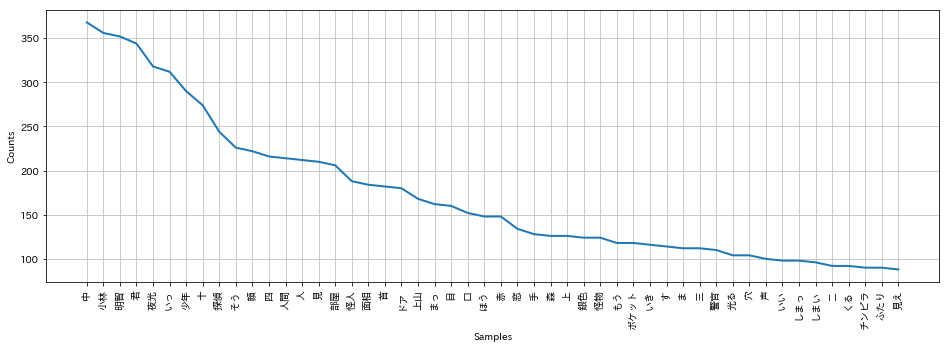

In [45]:
import nltk
from nltk.probability import FreqDist
freqdist = nltk.FreqDist(filtered2_word)

!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(16,5),)
freqdist.plot(50)

In [6]:
Fdist['夜光']

159

In [7]:
Fdist['明智']

176

In [46]:
from nltk.probability import FreqDist
Fdist = FreqDist(filtered2_word)
print(Fdist)

<FreqDist with 2777 samples and 31788 outcomes>


In [8]:
Fdist['明智']/len(word_tokens)

0.0038012137966782576

In [9]:
Fdist.plot(50, cumulative=True)

<Figure size 640x480 with 1 Axes>

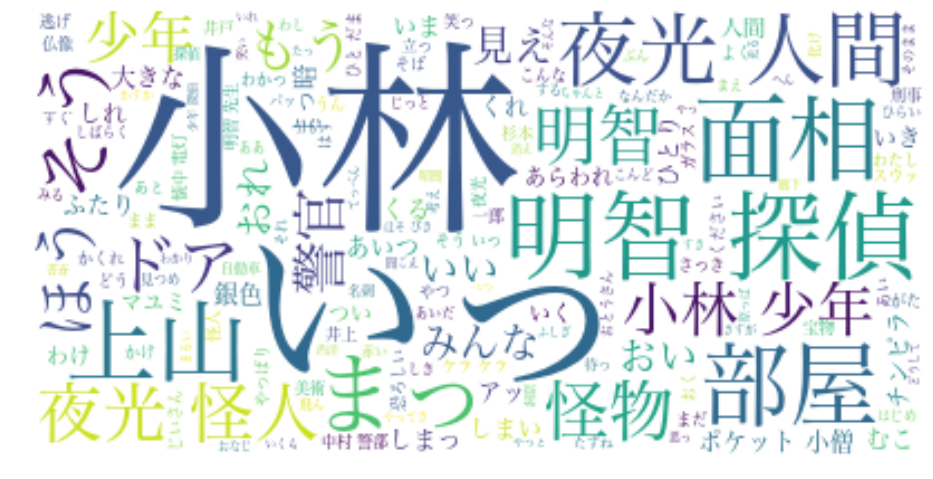

In [47]:
filtered_text=' '.join(filtered_word)
import os
os.path
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Morphological analysis
import MeCab
m = MeCab.Tagger('')
parsed = m.parse(filtered_text)
filtered2_text = ' '.join([x.split('\t')[0] for x in parsed.splitlines()[:-1] if x.split('\t')[1].split(',')[0] not in ['助詞', '助動詞','接続詞']])
#助詞　postpositional word
#助動詞　auxiliary verb
#接続詞　conjunction
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc',max_words=150,background_color="white").generate(filtered2_text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
wordcloud.to_file("textfile2/夜光人間.png")

In [49]:
lexical_diversity = len(set(word_tokens)) / len(word_tokens)
lexical_diversity

0.06477181918317099

In [50]:
len(set(word_tokens))

2999

In [51]:
len(word_tokens)

46301

In [52]:
parsed

'めし\t名詞,一般,*,*,*,*,めし,メシ,メシ\n会\t名詞,接尾,一般,*,*,*,会,カイ,カイ\n名\t名詞,接尾,一般,*,*,*,名,メイ,メイ\n探偵\t名詞,サ変接続,*,*,*,*,探偵,タンテイ,タンテイ\n｜\t記号,一般,*,*,*,*,｜,｜,｜\n明智\t名詞,固有名詞,人名,姓,*,*,明智,アケチ,アケチ\n小五郎\t名詞,固有名詞,人名,名,*,*,小五郎,コゴロウ,コゴロー\n少年\t名詞,一般,*,*,*,*,少年,ショウネン,ショーネン\n助手\t名詞,一般,*,*,*,*,助手,ジョシュ,ジョシュ\n小林\t名詞,固有名詞,人名,姓,*,*,小林,コバヤシ,コバヤシ\n芳雄\t名詞,固有名詞,人名,名,*,*,芳雄,ヨシオ,ヨシオ\n君\t名詞,接尾,人名,*,*,*,君,クン,クン\n団長\t名詞,一般,*,*,*,*,団長,ダンチョウ,ダンチョー\n少年\t名詞,一般,*,*,*,*,少年,ショウネン,ショーネン\n探偵\t名詞,サ変接続,*,*,*,*,探偵,タンテイ,タンテイ\n団\t名詞,接尾,一般,*,*,*,団,ダン,ダン\n小学校\t名詞,一般,*,*,*,*,小学校,ショウガッコウ,ショーガッコー\n五\t名詞,数,*,*,*,*,五,ゴ,ゴ\n六\t名詞,数,*,*,*,*,六,ロク,ロク\n年生\t名詞,接尾,助数詞,*,*,*,年生,ネンセイ,ネンセイ\n中学\t名詞,一般,*,*,*,*,中学,チュウガク,チューガク\n一\t名詞,数,*,*,*,*,一,イチ,イチ\n二\t名詞,数,*,*,*,*,二,ニ,ニ\n年生\t名詞,接尾,助数詞,*,*,*,年生,ネンセイ,ネンセイ\n少年\t名詞,一般,*,*,*,*,少年,ショウネン,ショーネン\n二\t名詞,数,*,*,*,*,二,ニ,ニ\n十\t名詞,数,*,*,*,*,十,ジュウ,ジュー\n人\t名詞,接尾,助数詞,*,*,*,人,ニン,ニン\n組織\t名詞,サ変接続,*,*,*,*,組織,ソシキ,ソシキ\nみんな\t名詞,代名詞,一般,*,*,*,みんな,ミンナ,ミンナ\n近く\t形容詞,自立,*,*,形容詞・アウオ段,連用テ接続,近い,チカク,チカク\n住ん\t動詞,自立,*,*,五段・マ行,連用タ接続,住む,スン,スン\nわけ\t名

In [16]:
import re
parts = [len(l.split()) for l in re.split(r'[?!。]', text) if l.strip()]

print(sum(parts)/len(parts))

19.113379669852304
